# Baseball Game Predictor and Gambling Program
----------------------------------------------

This notebook will go through the entire process of pulling data, cleaning data, feature engineering, and machine learning model creation 
to predict games and ultimately show the results of a betting strategy based upon the model's predictions. This notebook is not inclusive of all the methods
that were tried out in creating this model.  After any step that data was created or altered, files were saved in csv format. This notebook will reference
when files were created and where they are located. This is the final version of our model.  

## Pulling Data from PyBaseball's API
--------------------------------

The initial raw data will be pulled from PyBaseball.  Two functions are being used that pull our batting and hitting statistics. The statistics are daily statistics of every player that played in every game of the season we pull. There is a little light
cleaning of the initial raw data to drop unneeded columns and format to a datetime index.  These function are located in the libs folder inside 
the PyBaseball_data_pull_and_cleaning.py file. After pulling and cleaning data the csv files were saved in the Data folder.  DO NOT RUN THE
CELLS THAT PULL DATA.  The data has already been saved. This section will give an example of the data pulling and cleaning and show what the data looks like after.
The process of pulling this data takes a considerable amount of time.

In [1]:
# import functions from Libs
from Libs.PyBaseball_data_pull_and_cleaning import get_batting_data, get_pitching_data, clean_batting_data, clean_pitching_data
import pandas as pd

In [ ]:
# Pulling data for a specific year , DO NOT RUN THIS CELL
batting_data_2017 = get_batting_data('2017-04-02', '2016-10-01')


In [2]:
# Example of raw batting_data. 
raw_batting_data_2017 = pd.read_csv('./Data/Batting/Raw_Data/raw_batting_data_2017.csv')
raw_batting_data_2017.head()

,Name,Age,#days,Lev,Date,Tm,,Opp,G,PA,...,HBP,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS
0,Nick Ahmed,27,953,MLB-NL,"Apr 2, 2017",Arizona,NaN,San Francisco,1,1,...,0,0,0,0,0,0,1.00,1.00,1.00,2.00
1,Javier Baez,24,953,MLB-NL,"Apr 2, 2017",Chicago,@,St. Louis,1,4,...,0,0,0,0,0,0,0.25,0.25,0.25,0.50
2,Tim Beckham,27,953,MLB-AL,"Apr 2, 2017",Tampa Bay,NaN,New York,1,4,...,0,0,0,0,0,0,0.25,0.25,0.50,0.75
3,Brandon Belt,29,953,MLB-NL,"Apr 2, 2017",San Francisco,@,Arizona,1,5,...,0,0,0,0,0,0,0.00,0.40,0.00,0.40
4,Greg Bird,24,953,MLB-AL,"Apr 2, 2017",New York,@,Tampa Bay,1,5,...,0,0,0,0,0,0,0.00,0.20,0.00,0.20


In [3]:
# Example of raw pitching data
raw_pitching_data_2017 = pd.read_csv('./Data/Pitching/Raw_Data/raw_pitching_data_2017.csv')
raw_pitching_data_2017.head()

,Name,Age,#days,Lev,Date,Tm,,Opp,G,GS,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
0,Chris Archer,28,953,MLB-AL,"Apr 2, 2017",Tampa Bay,NaN,New York,1,1,...,0.61,0.20,0.11,0.55,0.14,0.05,1.143,0.304,6.4,5.0
1,Ty Blach,26,953,MLB-NL,"Apr 2, 2017",San Francisco,@,Arizona,1,0,...,0.60,0.20,0.00,1.00,0.00,0.00,0.000,0.000,0.0,NaN
2,Madison Bumgarner,27,953,MLB-NL,"Apr 2, 2017",San Francisco,@,Arizona,1,1,...,0.75,0.20,0.15,0.50,0.13,0.06,0.857,0.333,14.1,NaN
3,Andrew Chafin,27,953,MLB-NL,"Apr 2, 2017",Arizona,NaN,San Francisco,1,0,...,0.63,0.06,0.13,0.75,0.00,0.00,2.000,0.333,0.0,NaN
4,Alex Colome,28,953,MLB-AL,"Apr 2, 2017",Tampa Bay,NaN,New York,1,0,...,0.62,0.08,0.23,0.00,0.00,0.00,0.000,0.000,9.0,NaN


In [4]:
# Initial light cleaning of pulled data. Team names changed to format that matches our odds df, Fixed Home/Away column, dropped some unneeded stats
batting_data_clean_2017 = clean_batting_data(raw_batting_data_2017)
pitching_data_clean_2017 = clean_pitching_data(raw_pitching_data_2017)


In [5]:
# Example of clean batting_data. Team names changed to format that matches our odds df, Fixed Home/Away column, dropped some unneeded stats
clean_hitting_data = pd.read_csv('./Data/Batting/Clean_Data/clean_batting_data_2017.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
clean_hitting_data.head()

,Name,Tm,VH,Opp,G,PA,AB,R,H,2B,...,RBI,BB,IBB,SO,HBP,SH,SF,GDP,SB,CS
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-02,Nick Ahmed,ARI,0,San Francisco,1,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2017-04-02,Javier Baez,CUB,1,St. Louis,1,4,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-04-02,Tim Beckham,TAM,0,New York,1,4,4,1,1,1,...,0,0,0,2,0,0,0,0,0,0
2017-04-02,Brandon Belt,SFO,1,Arizona,1,5,3,0,0,0,...,0,2,0,1,0,0,0,0,0,0
2017-04-02,Greg Bird,NYY,1,Tampa Bay,1,5,4,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [6]:
# Example of clean pitching_data
clean_pitching_data = pd.read_csv('./Data/Pitching/Clean_Data/clean_pitching_data_2017.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
clean_pitching_data.head()

,Name,Tm,VH,Opp,G,GS,IP,H,R,ER,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-02,Chris Archer,TAM,0,New York,1,1,7.0,7,2,2,...,0.61,0.20,0.11,0.55,0.14,0.05,1.143,0.304,6.4,5.0
2017-04-02,Ty Blach,SFO,1,Arizona,1,0,0.2,0,0,0,...,0.60,0.20,0.00,1.00,0.00,0.00,0.000,0.000,0.0,NaN
2017-04-02,Madison Bumgarner,SFO,1,Arizona,1,1,7.0,6,3,3,...,0.75,0.20,0.15,0.50,0.13,0.06,0.857,0.333,14.1,NaN
2017-04-02,Andrew Chafin,ARI,0,San Francisco,1,0,1.0,2,1,1,...,0.63,0.06,0.13,0.75,0.00,0.00,2.000,0.333,0.0,NaN
2017-04-02,Alex Colome,TAM,0,New York,1,0,1.0,0,0,0,...,0.62,0.08,0.23,0.00,0.00,0.00,0.000,0.000,9.0,NaN


## Creating DataFrame for Feature Selection
---------------------------------------------

This section will create a dataframe from our saved batting and pitching csv files and concatenate it with the odds csv
files we downloaded to create one dataframe for each season.  The functions used for this process are in the Training_DataFrame_creation.py
file. The resulting dataframes have been saved in the Training Data folder.  Many different features were experimented with but ultimately
these are the features we settled upon. A look back period of 10 days to calculate stats resulted in the best performing model.

In [7]:
# Import functions for dataframe creation and pandas to read in csv files
import pandas as pd
from Libs.Training_DataFrame_creation import df_for_feature_selection

In [8]:
# Read in necessary data files for batting, pitching, and gambling odds
batting_data_2016 = pd.read_csv('./Data/Batting/Clean_Data/clean_batting_data_2016.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
batting_data_2017 = pd.read_csv('./Data/Batting/Clean_Data/clean_batting_data_2017.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
batting_data_2018 = pd.read_csv('./Data/Batting/Clean_Data/clean_batting_data_2018.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
batting_data_2019 = pd.read_csv('./Data/Batting/Clean_Data/clean_batting_data_2019.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)

pitching_data_2016 = pd.read_csv('./Data/Pitching/Clean_Data/clean_pitching_data_2016.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
pitching_data_2017 = pd.read_csv('./Data/Pitching/Clean_Data/clean_pitching_data_2017.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
pitching_data_2018 = pd.read_csv('./Data/Pitching/Clean_Data/clean_pitching_data_2018.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
pitching_data_2019 = pd.read_csv('./Data/Pitching/Clean_Data/clean_pitching_data_2019.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)

odds_df_2016 = pd.read_csv('./Betting_Odds/Clean_Odds/mlb_odds_2016.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
odds_df_2017 = pd.read_csv('./Betting_Odds/Clean_Odds/mlb_odds_2017.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
odds_df_2018 = pd.read_csv('./Betting_Odds/Clean_Odds/mlb_odds_2018.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)
odds_df_2019 = pd.read_csv('./Betting_Odds/Clean_Odds/mlb_odds_2019.csv', parse_dates = True, index_col = 'Date', infer_datetime_format = True)


In [9]:
batting_data_2016.head()

,Name,Tm,VH,Opp,G,PA,AB,R,H,2B,...,RBI,BB,IBB,SO,HBP,SH,SF,GDP,SB,CS
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-03,Matt Adams,STL,1,Pittsburgh,1,4,4,0,0,0,...,0,0,0,2,0,0,0,0,0,0
2016-04-03,Jose Bautista,TOR,1,Tampa Bay,1,4,2,1,0,0,...,0,2,0,1,0,0,0,0,0,0
2016-04-03,Asdrubal Cabrera,NYM,1,Kansas City,1,4,4,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2016-04-03,Lorenzo Cain,KAN,0,New York,1,4,2,2,1,0,...,0,2,0,1,0,0,0,0,0,0
2016-04-03,Eric Campbell,NYM,1,Kansas City,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
pitching_data_2016.head()

,Name,Tm,VH,Opp,G,GS,IP,H,R,ER,...,Str,StL,StS,GB/FB,LD,PU,WHIP,BAbip,SO9,SO/W
Date,,,,,,,,,,,,,,,,,,,,,
2016-04-03,Chris Archer,TAM,0,Toronto,1,1,5.0,5,3,2,...,0.62,0.19,0.18,0.44,0.56,0.00,1.60,0.556,21.6,4.0
2016-04-03,Jerry Blevins,NYM,1,Kansas City,1,0,1.0,0,0,0,...,0.64,0.27,0.09,0.67,0.00,0.00,0.00,0.000,0.0,NaN
2016-04-03,Bartolo Colon,NYM,1,Kansas City,1,0,1.1,1,0,0,...,0.65,0.30,0.00,0.75,0.00,0.25,0.75,0.250,6.8,NaN
2016-04-03,Wade Davis,KAN,0,New York,1,0,1.0,1,0,0,...,0.69,0.19,0.08,1.00,0.00,0.00,2.00,0.500,18.0,2.0
2016-04-03,Dana Eveland,TAM,0,Toronto,1,0,1.2,0,0,0,...,0.65,0.18,0.18,0.67,0.00,0.00,0.00,0.000,10.8,NaN


In [11]:
odds_df_2016.head()

,VH,Team,Pitcher,Open,Close,Final
Date,,,,,,
2016-04-03,V,STL,WAINWRIGHT-R,-115,109,1
2016-04-03,H,PIT,FLIRIANO-L,105,-119,4
2016-04-03,V,TOR,MSTROMAN-R,-115,111,5
2016-04-03,H,TAM,CARCHER-R,105,-121,3
2016-04-03,V,NYM,MHARVEY-R,-119,-120,3


In [12]:
#Create training dataframes for each season.  This cell takes a few minutes to run.
training_df_2016 = df_for_feature_selection(odds_df_2016, batting_data_2016, pitching_data_2016, look_back = 10)
training_df_2017 = df_for_feature_selection(odds_df_2017, batting_data_2017, pitching_data_2017, look_back = 10)
training_df_2018 = df_for_feature_selection(odds_df_2018, batting_data_2018, pitching_data_2018, look_back = 10)
training_df_2019 = df_for_feature_selection(odds_df_2019, batting_data_2019, pitching_data_2019, look_back = 10)


In [13]:
training_df_2016.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Visitor_PitchingStr,Visitor_PitchingStL,Visitor_PitchingStS,Visitor_PitchingGB/FB,Visitor_PitchingLD,Visitor_PitchingPU,Visitor_PitchingWHIP,Visitor_PitchingBAbip,Visitor_PitchingSO9,Visitor_PitchingSO/W
2016-04-13,NYM,MIA,LVERRETT-R,ACONLEY-L,-130,115,-115,105,1,0,...,17.14,4.72,3.08,8.27,9.08,2.11,48.104,9.311,232.1,29.67
2016-04-13,WAS,ATL,TROARK-R,MWISLER-R,-240,210,-141,126,1,0,...,22.47,4.85,3.42,15.76,5.44,1.16,61.495,10.888,318.4,23.49
2016-04-13,PHI,SDG,JEICKHOFF-R,CREA-R,-120,110,-115,105,1,0,...,20.90,5.32,3.45,14.53,7.85,3.28,51.958,7.751,296.3,33.08
2016-04-13,CUB,CIN,JLACKEY-R,ASIMON-R,-215,190,-200,175,1,0,...,18.42,5.40,3.49,14.20,6.75,1.80,44.915,5.960,253.5,27.75
2016-04-13,STL,MIL,MLEAKE-R,CANDERSON-R,-170,150,-145,130,0,1,...,20.87,5.37,3.04,14.86,8.17,1.55,60.623,8.784,190.2,16.75


In [14]:
training_df_2017.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Visitor_PitchingStr,Visitor_PitchingStL,Visitor_PitchingStS,Visitor_PitchingGB/FB,Visitor_PitchingLD,Visitor_PitchingPU,Visitor_PitchingWHIP,Visitor_PitchingBAbip,Visitor_PitchingSO9,Visitor_PitchingSO/W
2017-04-12,COL,SDG,KFREELAND-L,ZLEE-R,-166,146,-153,138,0,1,...,22.66,6.28,3.74,15.46,5.29,3.64,59.320,7.593,340.0,26.50
2017-04-12,PIT,CIN,INOVA-R,AGARRETT-L,-151,136,-147,132,0,1,...,22.26,5.91,4.86,21.83,5.90,1.94,46.448,7.940,353.9,31.47
2017-04-12,PHI,NYM,VVELASQUEZ-R,ZWHEELER-R,-111,101,-118,108,0,1,...,24.88,6.81,4.66,18.46,9.55,1.35,83.464,10.978,381.3,28.33
2017-04-12,WAS,STL,MSCHERZER-R,MLEAKE-R,-201,176,-180,160,0,1,...,20.09,5.75,2.97,12.92,5.93,2.91,60.135,9.782,201.9,25.50
2017-04-12,MIA,ATL,TKOEHLER-R,JGARCIA-L,-126,111,-109,-101,0,1,...,17.80,5.03,2.40,12.27,7.37,1.26,49.749,7.696,124.3,15.33


In [15]:
training_df_2018.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Visitor_PitchingStr,Visitor_PitchingStL,Visitor_PitchingStS,Visitor_PitchingGB/FB,Visitor_PitchingLD,Visitor_PitchingPU,Visitor_PitchingWHIP,Visitor_PitchingBAbip,Visitor_PitchingSO9,Visitor_PitchingSO/W
2018-04-08,PIT,CIN,JTAILLON-R,TMAHLE-R,-150,135,-155.0,140.0,1,0,...,19.00,5.12,3.61,13.06,7.94,1.34,61.293,7.581,208.2,24.67
2018-04-08,PHI,MIA,JARRIETA-R,TRICHARDS-R,-185,165,-200.0,175.0,0,1,...,26.20,6.12,4.56,15.10,9.09,3.52,63.438,11.517,405.9,40.17
2018-04-08,MIL,CUB,CANDERSON-R,JQUINTANA-L,115,-130,104.0,-114.0,0,1,...,25.37,6.55,5.00,15.47,7.60,2.78,50.047,9.846,391.7,38.18
2018-04-08,STL,ARI,LWEAVER-R,TWALKER-R,-145,130,-165.0,145.0,0,1,...,23.19,5.89,4.76,15.11,6.40,4.07,35.415,7.033,352.5,35.97
2018-04-08,COL,ATL,KFREELAND-L,SNEWCOMB-L,-140,125,-155.0,140.0,0,1,...,25.49,7.04,5.33,14.75,11.13,2.17,69.515,9.942,418.0,37.84


In [16]:
training_df_2019.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Visitor_PitchingStr,Visitor_PitchingStL,Visitor_PitchingStS,Visitor_PitchingGB/FB,Visitor_PitchingLD,Visitor_PitchingPU,Visitor_PitchingWHIP,Visitor_PitchingBAbip,Visitor_PitchingSO9,Visitor_PitchingSO/W
2019-03-30,WAS,NYM,SSTRASBURG-R,NSYNDERGAARD-R,-130,110,-112,102,0,1,...,2.59,0.62,0.80,0.66,1.75,0.08,1.000,0.417,51.0,10.00
2019-03-30,PHI,ATL,NPIVETTA-R,BWILSON-R,-145,125,-145,135,1,0,...,3.03,0.53,0.78,2.29,0.00,0.00,9.700,0.523,53.1,4.00
2019-03-30,MIA,COL,PLOPEZ-R,TANDERSON-L,125,-145,118,-128,1,0,...,4.78,1.36,0.77,3.94,0.53,0.05,3.262,0.156,50.7,7.33
2019-03-30,MIL,STL,BWOODRUFF-R,DHUDSON-R,-125,105,-132,122,1,0,...,5.74,1.49,1.04,4.59,2.11,0.13,7.646,1.238,60.5,9.00
2019-03-30,SDG,SFO,NMARGEVICIUS-L,DRODRIGUEZ-R,-125,105,-130,120,0,1,...,4.94,1.21,0.84,3.35,1.86,0.07,7.357,2.052,51.7,12.50


## Feature Selection and Stat Calculations 

Now that are dataframes are created for each game of the 2016, 2017, 2018, and 2019 seasons, our features are selected and stats are calculated using functions in the Baseball_stats.py
file located in Libs. The final stats that we used are K%(strikeout rate), BB%(walk rate), OBP(on base percentage), SLG%(slugging percentage).  These stats were calculated
over the 10 day look back period for the home and visiting team.  The stats are a reflection of how the hitters performed versus what the opposing pitchers allowed. 

In [17]:
# import functions from Baseball_stats.py in Libs folder
from Libs.Baseball_stats import baseball_stats_calculator_hitting, baseball_stats_calculator_pitching

In [18]:
# Calculate stats
feature_df_hitting_2016 = baseball_stats_calculator_hitting(training_df_2016)
final_feature_df_2016 = baseball_stats_calculator_pitching(feature_df_hitting_2016)
feature_df_hitting_2017 = baseball_stats_calculator_hitting(training_df_2017)
final_feature_df_2017 = baseball_stats_calculator_pitching(feature_df_hitting_2017)
feature_df_hitting_2018 = baseball_stats_calculator_hitting(training_df_2018)
final_feature_df_2018 = baseball_stats_calculator_pitching(feature_df_hitting_2018)
feature_df_hitting_2019 = baseball_stats_calculator_hitting(training_df_2019)
final_feature_df_2019 = baseball_stats_calculator_pitching(feature_df_hitting_2019)


In [19]:
final_feature_df_2016.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Home_PitchingSLG%_allowed,Visitor_PitchingK%,Visitor_PitchingBB%,Visitor_PitchingOBP_num,Visitor_PitchingOBP_den,Visitor_PitchingOBP_allowed,Visitor_Pitching1B,Visitor_PitchingSLG%_num,Visitor_PitchingSLG%_den,Visitor_PitchingSLG%_allowed
2016-04-13,NYM,MIA,LVERRETT-R,ACONLEY-L,-130,115,-115,105,1,0,...,0.353448,0.234568,0.119342,84.0,240.0,0.350000,36.0,87.0,210.0,0.414286
2016-04-13,WAS,ATL,TROARK-R,MWISLER-R,-240,210,-141,126,1,0,...,0.338384,0.213058,0.113402,107.0,289.0,0.370242,49.0,110.0,247.0,0.445344
2016-04-13,PHI,SDG,JEICKHOFF-R,CREA-R,-120,110,-115,105,1,0,...,0.330677,0.219672,0.091803,102.0,305.0,0.334426,38.0,129.0,271.0,0.476015
2016-04-13,CUB,CIN,JLACKEY-R,ASIMON-R,-215,190,-200,175,1,0,...,0.309417,0.209738,0.108614,86.0,262.0,0.328244,32.0,84.0,226.0,0.371681
2016-04-13,STL,MIL,MLEAKE-R,CANDERSON-R,-170,150,-145,130,0,1,...,0.341991,0.164794,0.093633,93.0,266.0,0.349624,36.0,127.0,235.0,0.540426


In [20]:
final_feature_df_2017.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Home_PitchingSLG%_allowed,Visitor_PitchingK%,Visitor_PitchingBB%,Visitor_PitchingOBP_num,Visitor_PitchingOBP_den,Visitor_PitchingOBP_allowed,Visitor_Pitching1B,Visitor_PitchingSLG%_num,Visitor_PitchingSLG%_den,Visitor_PitchingSLG%_allowed
2017-04-12,COL,SDG,KFREELAND-L,ZLEE-R,-166,146,-153,138,0,1,...,0.437931,0.190769,0.101538,103.0,325.0,0.316923,34.0,130.0,287.0,0.452962
2017-04-12,PIT,CIN,INOVA-R,AGARRETT-L,-151,136,-147,132,0,1,...,0.437008,0.259386,0.129693,87.0,292.0,0.297945,32.0,77.0,253.0,0.304348
2017-04-12,PHI,NYM,VVELASQUEZ-R,ZWHEELER-R,-111,101,-118,108,0,1,...,0.551471,0.240385,0.080128,94.0,310.0,0.303226,48.0,104.0,283.0,0.367491
2017-04-12,WAS,STL,MSCHERZER-R,MLEAKE-R,-201,176,-180,160,0,1,...,0.442857,0.188679,0.078616,110.0,314.0,0.350318,48.0,130.0,280.0,0.464286
2017-04-12,MIA,ATL,TKOEHLER-R,JGARCIA-L,-126,111,-109,-101,0,1,...,0.424242,0.141791,0.100746,92.0,265.0,0.347170,46.0,92.0,232.0,0.396552


In [21]:
final_feature_df_2018.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Home_PitchingSLG%_allowed,Visitor_PitchingK%,Visitor_PitchingBB%,Visitor_PitchingOBP_num,Visitor_PitchingOBP_den,Visitor_PitchingOBP_allowed,Visitor_Pitching1B,Visitor_PitchingSLG%_num,Visitor_PitchingSLG%_den,Visitor_PitchingSLG%_allowed
2018-04-08,PIT,CIN,JTAILLON-R,TMAHLE-R,-150,135,-155.0,140.0,1,0,...,0.400697,0.163636,0.109091,96.0,274.0,0.350365,37.0,108.0,235.0,0.459574
2018-04-08,PHI,MIA,JARRIETA-R,TRICHARDS-R,-185,165,-200.0,175.0,0,1,...,0.376068,0.218667,0.104000,132.0,373.0,0.353887,52.0,149.0,327.0,0.455657
2018-04-08,MIL,CUB,CANDERSON-R,JQUINTANA-L,115,-130,104.0,-114.0,0,1,...,0.422840,0.216867,0.108434,105.0,329.0,0.319149,46.0,90.0,286.0,0.314685
2018-04-08,STL,ARI,LWEAVER-R,TWALKER-R,-145,130,-165.0,145.0,0,1,...,0.402256,0.275641,0.076923,85.0,308.0,0.275974,42.0,100.0,282.0,0.354610
2018-04-08,COL,ATL,KFREELAND-L,SNEWCOMB-L,-140,125,-155.0,140.0,0,1,...,0.398649,0.228916,0.138554,114.0,330.0,0.345455,37.0,112.0,278.0,0.402878


In [22]:
final_feature_df_2019.head()

,home,visitor,home_pitcher,visitor_pitcher,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,...,Home_PitchingSLG%_allowed,Visitor_PitchingK%,Visitor_PitchingBB%,Visitor_PitchingOBP_num,Visitor_PitchingOBP_den,Visitor_PitchingOBP_allowed,Visitor_Pitching1B,Visitor_PitchingSLG%_num,Visitor_PitchingSLG%_den,Visitor_PitchingSLG%_allowed
2019-03-30,WAS,NYM,SSTRASBURG-R,NSYNDERGAARD-R,-130,110,-112,102,0,1,...,0.258065,0.424242,0.030303,7.0,33.0,0.212121,4.0,6.0,31.0,0.193548
2019-03-30,PHI,ATL,NPIVETTA-R,BWILSON-R,-145,125,-145,135,1,0,...,0.366667,0.243243,0.162162,13.0,37.0,0.351351,4.0,16.0,31.0,0.516129
2019-03-30,MIA,COL,PLOPEZ-R,TANDERSON-L,125,-145,118,-128,1,0,...,0.432432,0.246154,0.061538,12.0,65.0,0.184615,2.0,18.0,59.0,0.305085
2019-03-30,MIL,STL,BWOODRUFF-R,DHUDSON-R,-125,105,-132,122,1,0,...,0.555556,0.194030,0.059701,20.0,67.0,0.298507,9.0,31.0,61.0,0.508197
2019-03-30,SDG,SFO,NMARGEVICIUS-L,DRODRIGUEZ-R,-125,105,-130,120,0,1,...,0.269841,0.290323,0.080645,20.0,62.0,0.322581,9.0,23.0,55.0,0.418182


## Model creation
---------------------

We tried many different machine learning models such as SVM, RandomForestClassifier, AdaBoostClassifier, and Neural Networks.  PCA analysis was done but did not produce
anything that increased accuracy.  The data was scaled using the StandardScaler which did increase accuracy. The final model was a RandomForestClassifier pretty much out of the box with the data scaled.  There was experimentation with hyperparameter tuning that did not increase accuracy scores. Below is an example of a our final model for one season.  All season predictions from our model have been saved in the Predictions Vs Actual folder.

In [23]:
# Import necessary functions for model creation and evaluation
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [24]:
# Read csv file for 2017.  The training dataframes for each season are located in the Training Data folder
baseball_data_2017 = pd.read_csv('./Training_Data/2017_10_day.csv',index_col = 'Date', infer_datetime_format = True, parse_dates = True)


In [25]:
baseball_data_2017.head()


,home,visitor,home_open_odds,visitor_open_odds,home_close_odds,visitor_close_odds,home_win_loss,visitor_win_loss,Home_PitchingK%,Home_PitchingBB%,...,Visitor_PitchingOBP_allowed,Visitor_PitchingSLG%_allowed,Home_HittingK%,Home_HittingBB%,Home_HittingOBP,Home_HittingSLG%,Visitor_HittingK%,Visitor_HittingBB%,Visitor_HittingOBP,Visitor_HittingSLG%
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-12,COL,SDG,-166,146,-153,138,0,1,0.278287,0.091743,...,0.316923,0.452962,0.225000,0.081250,0.304762,0.440559,0.221875,0.084375,0.282540,0.385159
2017-04-12,PIT,CIN,-151,136,-147,132,0,1,0.167247,0.080139,...,0.297945,0.304348,0.172161,0.087912,0.307407,0.290456,0.171717,0.067340,0.320819,0.484962
2017-04-12,PHI,NYM,-111,101,-118,108,0,1,0.229508,0.088525,...,0.303226,0.367491,0.243421,0.105263,0.332237,0.453532,0.214286,0.094156,0.305195,0.449275
2017-04-12,WAS,STL,-201,176,-180,160,0,1,0.205788,0.067524,...,0.350318,0.464286,0.212025,0.110759,0.385350,0.521739,0.213333,0.103333,0.302013,0.324427
2017-04-12,MIA,ATL,-126,111,-109,-101,0,1,0.243137,0.086275,...,0.347170,0.396552,0.223443,0.080586,0.344444,0.400826,0.225806,0.060932,0.306859,0.395257


In [26]:
# Show column names
baseball_data_2017.columns.values

array(['home', 'visitor', 'home_open_odds', 'visitor_open_odds',
       'home_close_odds', 'visitor_close_odds', 'home_win_loss',
       'visitor_win_loss', 'Home_PitchingK%', 'Home_PitchingBB%',
       'Home_PitchingOBP_allowed', 'Home_PitchingSLG%_allowed',
       'Visitor_PitchingK%', 'Visitor_PitchingBB%',
       'Visitor_PitchingOBP_allowed', 'Visitor_PitchingSLG%_allowed',
       'Home_HittingK%', 'Home_HittingBB%', 'Home_HittingOBP',
       'Home_HittingSLG%', 'Visitor_HittingK%', 'Visitor_HittingBB%',
       'Visitor_HittingOBP', 'Visitor_HittingSLG%'], dtype=object)

#### From the dataframe we used all columns except the team names, home_close_odds, visitor_close_odds, home_win_loss, and visitor_win_loss.  The resulting stats columns will be our training features.  The training labels is the home_win_loss column.

In [27]:
# Create training features and labels
X = baseball_data_2017[['home_open_odds', 'visitor_open_odds','Home_PitchingK%', 'Home_PitchingBB%',
       'Home_PitchingOBP_allowed', 'Home_PitchingSLG%_allowed',
       'Visitor_PitchingK%', 'Visitor_PitchingBB%',
       'Visitor_PitchingOBP_allowed', 'Visitor_PitchingSLG%_allowed',
       'Home_HittingK%', 'Home_HittingBB%', 'Home_HittingOBP',
       'Home_HittingSLG%', 'Visitor_HittingK%', 'Visitor_HittingBB%',
       'Visitor_HittingOBP', 'Visitor_HittingSLG%']]
y = baseball_data_2017['home_win_loss']

In [28]:
X.head()

,home_open_odds,visitor_open_odds,Home_PitchingK%,Home_PitchingBB%,Home_PitchingOBP_allowed,Home_PitchingSLG%_allowed,Visitor_PitchingK%,Visitor_PitchingBB%,Visitor_PitchingOBP_allowed,Visitor_PitchingSLG%_allowed,Home_HittingK%,Home_HittingBB%,Home_HittingOBP,Home_HittingSLG%,Visitor_HittingK%,Visitor_HittingBB%,Visitor_HittingOBP,Visitor_HittingSLG%
Date,,,,,,,,,,,,,,,,,,
2017-04-12,-166,146,0.278287,0.091743,0.320988,0.437931,0.190769,0.101538,0.316923,0.452962,0.225000,0.081250,0.304762,0.440559,0.221875,0.084375,0.282540,0.385159
2017-04-12,-151,136,0.167247,0.080139,0.346290,0.437008,0.259386,0.129693,0.297945,0.304348,0.172161,0.087912,0.307407,0.290456,0.171717,0.067340,0.320819,0.484962
2017-04-12,-111,101,0.229508,0.088525,0.348684,0.551471,0.240385,0.080128,0.303226,0.367491,0.243421,0.105263,0.332237,0.453532,0.214286,0.094156,0.305195,0.449275
2017-04-12,-201,176,0.205788,0.067524,0.330097,0.442857,0.188679,0.078616,0.350318,0.464286,0.212025,0.110759,0.385350,0.521739,0.213333,0.103333,0.302013,0.324427
2017-04-12,-126,111,0.243137,0.086275,0.307087,0.424242,0.141791,0.100746,0.347170,0.396552,0.223443,0.080586,0.344444,0.400826,0.225806,0.060932,0.306859,0.395257


In [29]:
X.columns.values

array(['home_open_odds', 'visitor_open_odds', 'Home_PitchingK%',
       'Home_PitchingBB%', 'Home_PitchingOBP_allowed',
       'Home_PitchingSLG%_allowed', 'Visitor_PitchingK%',
       'Visitor_PitchingBB%', 'Visitor_PitchingOBP_allowed',
       'Visitor_PitchingSLG%_allowed', 'Home_HittingK%',
       'Home_HittingBB%', 'Home_HittingOBP', 'Home_HittingSLG%',
       'Visitor_HittingK%', 'Visitor_HittingBB%', 'Visitor_HittingOBP',
       'Visitor_HittingSLG%'], dtype=object)

In [30]:
y.head()

Date
2017-04-12    0
2017-04-12    0
2017-04-12    0
2017-04-12    0
2017-04-12    0
Name: home_win_loss, dtype: int64

In [31]:
# Scale the features
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

#### We found that training our model on half a season provided the best results

In [32]:
# Calculate midpoint of the season
len(baseball_data_2017) * 0.50

1157.5

In [33]:
# Split the data into training and testing samples 
X_train = X_transformed[:1158]
X_test = X_transformed[1159:]
y_train = y[:1158]
y_test = y[1159:]

In [45]:
# Instantiate the model
rf_model = RandomForestClassifier(n_estimators= 1000, random_state= 1)

In [46]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [47]:
# Get model predictions
predictions_rf = rf_model.predict(X_test)

In [48]:
# Calculate accuracy score
acc_score = accuracy_score(y_test, predictions_rf)

In [49]:
print(f'The accuracy score for the 2nd half of the 2016 season: {acc_score}')

The accuracy score for the 2nd half of the 2016 season: 0.5717993079584776


In [50]:
# Find feature importances
importances = rf_model.feature_importances_

In [51]:
# Show features importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.06624787561864297, 'Visitor_HittingSLG%'),
 (0.06229300208069371, 'Visitor_HittingK%'),
 (0.060679508553393754, 'Home_HittingK%'),
 (0.05792353325268236, 'visitor_open_odds'),
 (0.05733060250616051, 'Home_PitchingBB%'),
 (0.057108993388278496, 'Home_PitchingSLG%_allowed'),
 (0.05656822910987235, 'home_open_odds'),
 (0.05541865948582423, 'Home_PitchingK%'),
 (0.05541632863145402, 'Visitor_PitchingK%'),
 (0.05458270705008487, 'Visitor_HittingBB%'),
 (0.053757192009327784, 'Visitor_PitchingBB%'),
 (0.053058385105183174, 'Visitor_HittingOBP'),
 (0.05263983730183832, 'Visitor_PitchingSLG%_allowed'),
 (0.05230597455564414, 'Visitor_PitchingOBP_allowed'),
 (0.05191499202704908, 'Home_HittingBB%'),
 (0.05171758754642389, 'Home_HittingSLG%'),
 (0.0509409077903464, 'Home_PitchingOBP_allowed'),
 (0.050095683987099904, 'Home_HittingOBP')]

In [52]:
# Show classification report
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50       534
           1       0.59      0.67      0.63       622

    accuracy                           0.57      1156
   macro avg       0.57      0.56      0.56      1156
weighted avg       0.57      0.57      0.57      1156



In [59]:
# Create a dataframe with the predictions, actual results, and odds
actual_df = pd.DataFrame(y_test)
actual_df.reset_index(inplace = True)
predict_df = pd.DataFrame(predictions_rf)
actual_predict_df = pd.concat([actual_df,predict_df], axis = 1, join = 'inner')
odds_df_new = baseball_data_2017[['home','visitor','home_open_odds','visitor_open_odds']][1159:]
odds_df_new.reset_index(inplace = True)
odds_df_new.drop(columns = ['Date'],inplace = True)
df = pd.concat([actual_df,predict_df, odds_df_new], axis = 1, join ='inner')
df.set_index('Date', inplace = True)
df.columns = ['Actual','Predicted','Home','Visitor','Home_Open_Odds','Visitor_Open_Odds']
df.head()

,Actual,Predicted,Home,Visitor,Home_Open_Odds,Visitor_Open_Odds
Date,,,,,,
2017-07-06,1,0,TOR,HOU,142,-157
2017-07-06,1,0,TAM,BOS,134,-149
2017-07-06,1,1,MIN,BAL,-156,141
2017-07-06,0,0,SEA,OAK,-144,129
2017-07-06,1,1,DET,SFO,-111,101


## Gambling Results
---------------------

Here we experiment with a few different gambling strategies based on our model's results. The function used to calculate our profits or losses is located in the Gambling.py file in the Libs folder.  Our working theory was to focus on underdogs with our gambling strategy because the underdogs provide more value and require a lower accuracy in predictions.  We calculate our total profits for all scenarios.  The results confirm that our model should be used exclusively on betting underdogs that our model predicts to win.

In [60]:
from Libs.Gambling import find_total_profits
from pathlib import Path
import pandas as pd

In [61]:
years = ['2016','2017','2018','2019']
bet_amount = 100
for year in years:
    csv_name = './Predictions_Vs_Actual/predictions_' + year + '.csv'
    csv_path = Path(csv_name)
    df = pd.read_csv(csv_path, index_col = 'Date')
    find_total_profits(df,bet_amount, year)
   

Betting on the favorites to win at home: $-875.35    The accuracy of betting on the favorites to win at home is 60.3%
The number of games that would have been bet on is 539
Betting on the favorites to win on the road: $-1897.65    The accuracy of betting on the favorites to win on the road is 52.51%
The number of games that would have been bet on is 219
Betting on the underdogs to win at home: $2782.0    The accuracy of betting on the underdogs to win at home is 52.02%
The number of games that would have been bet on is 173
Betting on the dogs to win on the road: $2269.0    The accuracy of betting on the underdogs to win on the road is 47.58%
The number of games that would have been bet on is 227
Total profits for the second half of the 2016 season: $2278.0



Betting on the favorites to win at home: $-629.15    The accuracy of betting on the favorites to win at home is 60.22%
The number of games that would have been bet on is 553
Betting on the favorites to win on the road: $1385.32   

C:\Users\willi\Desktop\Project_2\Libs\Gambling.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_win_fav_true['Home_Open_Odds'] = ((bet_amount)/(abs(home_win_fav_true['Home_Open_Odds'])/100))
C:\Users\willi\Desktop\Project_2\Libs\Gambling.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_loss_fav_true['Visitor_Open_Odds'] = ((bet_amount)/(abs(home_loss_fav_true['Visitor_Open_Odds'])/100))
C:\Users\willi\Desktop\Project_2\Libs\Gambling.py:37: SettingWithCopyWarning: 
A value is trying to be set

## Final Results

Based upon the different gambling strategies we tried our model on, we found the best option by far was to bet on the underdogs that our model predicted to win. The dog_strategy() function from the Dogs_gambling.py file is used to calculate the profits/losses on our dogs strategy.  

In [94]:
# import dog_strategy()
from Libs.Dogs_gambling_strategy import dog_strategy
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Read in model predictions vs actuals for each season
pred_vs_actual_2016 = pd.read_csv('./Predictions_Vs_Actual/predictions_2016.csv', index_col = 'Date')
pred_vs_actual_2017 = pd.read_csv('./Predictions_Vs_Actual/predictions_2017.csv', index_col = 'Date')
pred_vs_actual_2018 = pd.read_csv('./Predictions_Vs_Actual/predictions_2018.csv', index_col = 'Date')
pred_vs_actual_2019 = pd.read_csv('./Predictions_Vs_Actual/predictions_2019.csv', index_col = 'Date')


In [137]:
pred_vs_actual_2016.head()

,Actual,Predicted,Home,Visitor,Home_Open_Odds,Visitor_Open_Odds
Date,,,,,,
2016-07-06,1,0,MIN,OAK,-106,-104
2016-07-06,1,1,TOR,KAN,-180,160
2016-07-06,0,1,TAM,LAA,-150,135
2016-07-06,0,0,BOS,TEX,-185,165
2016-07-06,1,1,HOU,SEA,-165,145


In [65]:
# Calculate results of betting strategy for 2016
results_2016 = dog_strategy(pred_vs_actual_2016)

In [66]:
# Calculate accuracy of picks
correct_picks_2016 = results_2016[results_2016['Profit_Loss'] > 0]
accuracy_2016 = round(len(correct_picks_2016)/len(results_2016), 2) * 100
print(f'2016 accuracy: {accuracy_2016}%')

2016 accuracy: 49.0%


In [67]:
# Show number of games bet on
number_of_games_bet_on_2016 = len(results_2016)
print(f'Number of games bet on in 2016: {number_of_games_bet_on_2016}')

Number of games bet on in 2016: 400


In [68]:
results_2016.head()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2016-07-06,TEX,BOS,TEX,100,1000,165,165,1165
2016-07-06,CWS,NYY,CWS,100,1165,110,275,1275
2016-07-06,BAL,LOS,BAL,100,1275,135,410,1410
2016-07-07,STL,PIT,PIT,100,1410,-100,310,1310
2016-07-07,NYM,WAS,WAS,100,1310,-100,210,1210


In [69]:
results_2016.tail()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2016-10-02,MIA,WAS,MIA,100,5780,220,5000,6000
2016-10-02,CUB,CIN,CUB,100,6000,-100,4900,5900
2016-10-02,TOR,BOS,TOR,100,5900,116,5016,6016
2016-10-02,LAA,HOU,HOU,100,6016,-100,4916,5916
2016-10-02,ATL,DET,ATL,100,5916,135,5051,6051


In [70]:
# Calculate results of betting strategy for 2017
results_2017 = dog_strategy(pred_vs_actual_2017)

In [71]:
# Calculate accuracy of picks for 2017
correct_picks_2017 = results_2017[results_2017['Profit_Loss'] > 0]
accuracy_2017 = round(len(correct_picks_2017)/len(results_2017), 2) * 100
print(f'2017 accuracy: {accuracy_2017}%')

2017 accuracy: 48.0%


In [72]:
# Show number of games bet on
number_of_games_bet_on_2017 = len(results_2017)
print(f'Number of games bet on in 2017: {number_of_games_bet_on_2017}')

Number of games bet on in 2017: 339


In [73]:
results_2017.head()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2017-07-06,OAK,SEA,OAK,100,1000,129,129,1129
2017-07-07,SDG,PHI,SDG,100,1129,125,254,1254
2017-07-07,WAS,ATL,ATL,100,1254,-100,154,1154
2017-07-07,MIN,BAL,MIN,100,1154,105,259,1259
2017-07-07,SEA,OAK,OAK,100,1259,-100,159,1159


In [74]:
results_2017.tail()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2017-10-01,ATL,MIA,ATL,100,3059,135,2194,3194
2017-10-01,CIN,CUB,CIN,100,3194,160,2354,3354
2017-10-01,TOR,NYY,TOR,100,3354,140,2494,3494
2017-10-01,MIN,DET,DET,100,3494,-100,2394,3394
2017-10-01,TAM,BAL,BAL,100,3394,-100,2294,3294


In [75]:
# Calculate results of betting strategy for 2018
results_2018 = dog_strategy(pred_vs_actual_2018)

In [76]:
# Calculate accuracy of picks in 2018
correct_picks_2018 = results_2018[results_2018['Profit_Loss'] > 0]
accuracy_2018 = round(len(correct_picks_2018)/len(results_2018), 2) * 100
print(f'2018 accuracy: {accuracy_2018}%')

2018 accuracy: 59.0%


In [77]:
# Show number of games bet on 
number_of_games_bet_on_2018 = len(results_2018)
print(f'Number of games bet on in 2018: {number_of_games_bet_on_2018}')

Number of games bet on in 2018: 529


In [78]:
results_2018.head()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2018-07-04,BAL,MIN,BAL,100,1000,141,141,1141
2018-07-04,OAK,SEA,OAK,100,1141,129,270,1270
2018-07-05,BOS,TAM,BOS,100,1270,-100,170,1170
2018-07-05,LAA,TEX,LAA,100,1170,141,311,1311
2018-07-05,MIN,BAL,MIN,100,1311,105,416,1416


In [79]:
results_2018.tail()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2018-09-30,KAN,ARI,KAN,100,22810,104,21914,22914
2018-09-30,PHI,NYM,NYM,100,22914,-100,21814,22814
2018-09-30,SFO,SDG,SDG,100,22814,-100,21714,22714
2018-09-30,MIA,ATL,ATL,100,22714,-100,21614,22614
2018-09-30,COL,LOS,COL,100,22614,120,21734,22734


In [80]:
# Calculate results of betting strategy for 2019
results_2019 = dog_strategy(pred_vs_actual_2019)

In [81]:
# Calculate accuracy of picks in 2019
correct_picks_2019 = results_2019[results_2019['Profit_Loss'] > 0]
accuracy_2019 = round(len(correct_picks_2019)/len(results_2019), 2) * 100
print(f'2019 accuracy: {accuracy_2019}%')

2019 accuracy: 56.99999999999999%


In [82]:
# Show number of games bet on 
number_of_games_bet_on_2019 = len(results_2019)
print(f'Number of games bet on in 2019: {number_of_games_bet_on_2019}')

Number of games bet on in 2019: 498


In [83]:
results_2019.head()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2019-06-29,ATL,CUB,ATL,100,1000,105,105,1105
2019-06-29,TOR,NYY,TOR,100,1105,218,323,1323
2019-06-29,CLE,KAN,KAN,100,1323,-100,223,1223
2019-06-29,DET,TEX,DET,100,1223,115,338,1338
2019-06-29,SDG,BAL,SDG,100,1338,-100,238,1238


In [84]:
results_2019.tail()

,Winner,Loser,Prediction,Current_Bet,Previous_Bankroll,Profit_Loss,Total_Profit_Loss,Current_Bankroll
Date,,,,,,,,
2019-09-29,PHI,WAS,PHI,100,21474,207,20681,21681
2019-09-29,DET,MIN,DET,100,21681,160,20841,21841
2019-09-29,LAA,HOU,LAA,100,21841,203,21044,22044
2019-09-29,MIA,PHI,MIA,100,22044,155,21199,22199
2019-09-29,STL,CUB,CUB,100,22199,-100,21099,22099


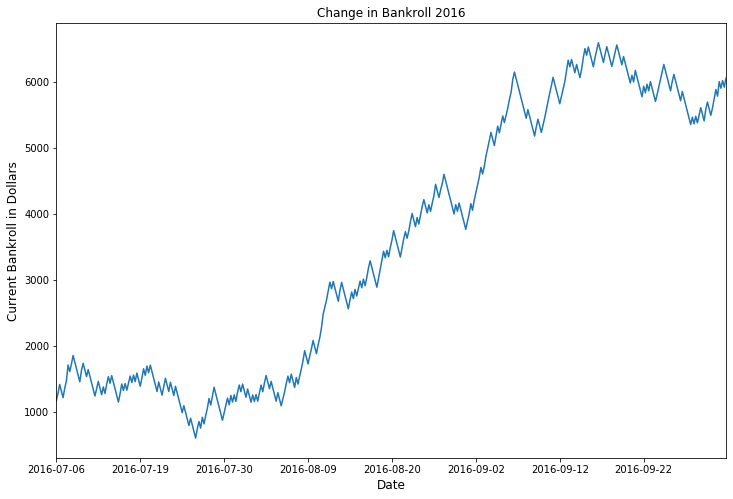

In [98]:
# Plot change in bankroll throughout second half of 2016 season
ax = results_2016['Current_Bankroll'].plot(figsize = (12, 8), title = 'Change in Bankroll 2016')
ax.set_ylabel('Current Bankroll in Dollars', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
plt.show()

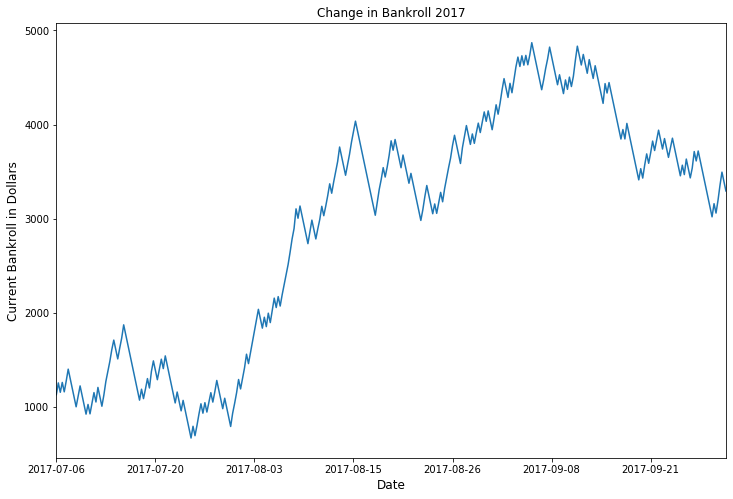

In [99]:
# Plot change in bankroll throughout second half of 2017 season
ax = results_2017['Current_Bankroll'].plot(figsize = (12, 8), title = 'Change in Bankroll 2017')
ax.set_ylabel('Current Bankroll in Dollars', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
plt.show()

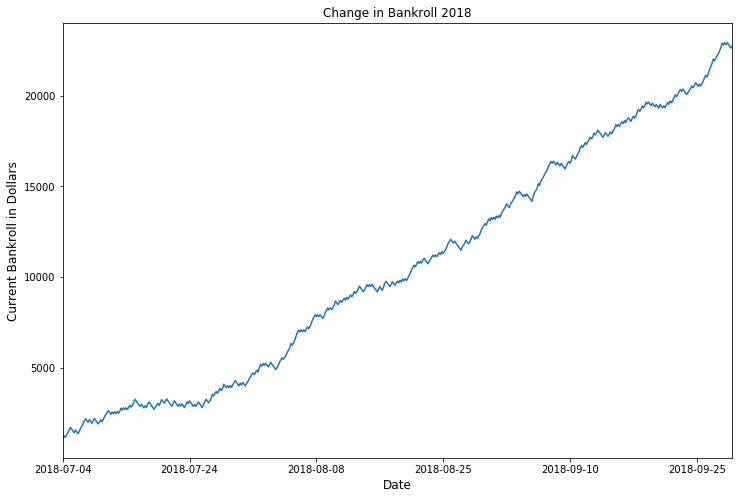

In [100]:
# Plot change in bankroll throughout second half of 2018 season
ax = results_2018['Current_Bankroll'].plot(figsize = (12, 8), title = 'Change in Bankroll 2018')
ax.set_ylabel('Current Bankroll in Dollars', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
plt.show()

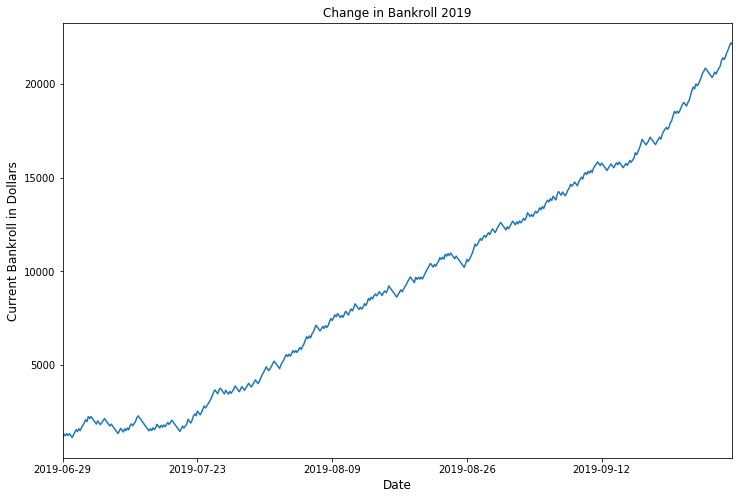

In [101]:
# Plot change in bankroll throughout second half of 2019 season
ax = results_2019['Current_Bankroll'].plot(figsize = (12, 8), title = 'Change in Bankroll 2019')
ax.set_ylabel('Current Bankroll in Dollars', fontsize = 12)
ax.set_xlabel('Date', fontsize = 12)
plt.show()

In [119]:
# Make a dataframe of pick accuracy per season
accuracies = [accuracy_2016, accuracy_2017, accuracy_2018, accuracy_2019]
seasons = ['2016', '2017', '2018', '2019']
accuracies_by_season = pd.DataFrame(accuracies, seasons)
accuracies_by_season.columns = ['Accuracy']

In [120]:
accuracies_by_season

,Accuracy
2016,49.0
2017,48.0
2018,59.0
2019,57.0


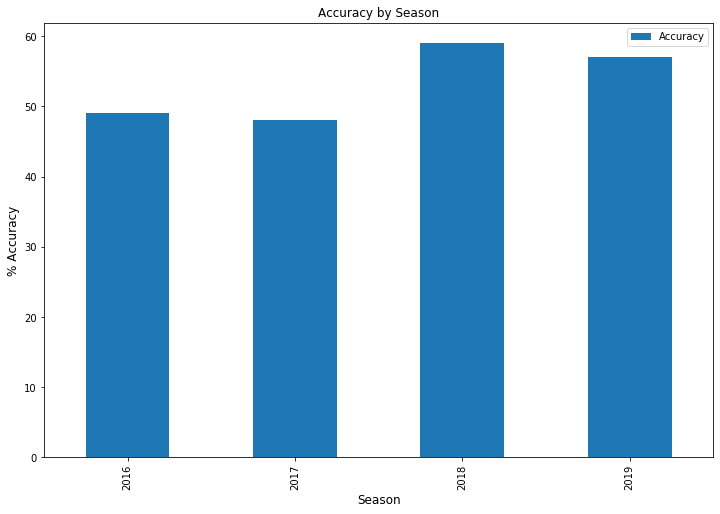

In [121]:
# Plot accuracy per season
ax = accuracies_by_season.plot(kind = 'bar', figsize = (12,8), title = 'Accuracy by Season')
ax.set_ylabel('% Accuracy', fontsize = 12)
ax.set_xlabel('Season', fontsize = 12)
plt.show()

In [118]:
# Create dataframe of games bet on per season
number_of_games_bet_on = [number_of_games_bet_on_2016, number_of_games_bet_on_2017, number_of_games_bet_on_2018, number_of_games_bet_on_2019]
number_of_games_bet_on_by_season = pd.DataFrame(number_of_games_bet_on, seasons)
number_of_games_bet_on_by_season.columns = ['Games_Bet_On']

In [122]:
number_of_games_bet_on_by_season

,Games_Bet_On
2016,400
2017,339
2018,529
2019,498


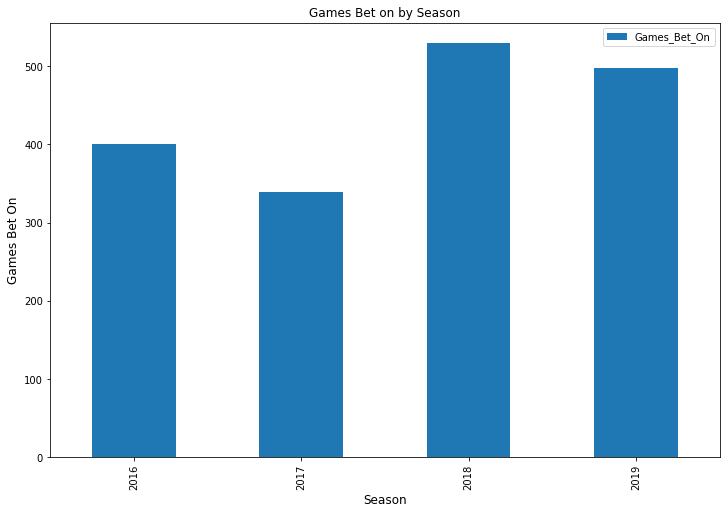

In [123]:
# Plot games bet on per season
ax = number_of_games_bet_on_by_season.plot(kind = 'bar', figsize = (12,8), title = 'Games Bet on by Season')
ax.set_ylabel('Games Bet On', fontsize = 12)
ax.set_xlabel('Season', fontsize = 12)
plt.show()

In [132]:
# Create dataframe of profits per season
total_profit_loss = [results_2016['Total_Profit_Loss'].iloc[-1], results_2017['Total_Profit_Loss'].iloc[-1], results_2018['Total_Profit_Loss'].iloc[-1], results_2019['Total_Profit_Loss'].iloc[-1]]
total_profit_loss_by_season = pd.DataFrame(total_profit_loss, seasons)
total_profit_loss_by_season.columns = ['Total_Profit_Loss']

In [133]:
total_profit_loss_by_season

,Total_Profit_Loss
2016,5051
2017,2294
2018,21734
2019,21099


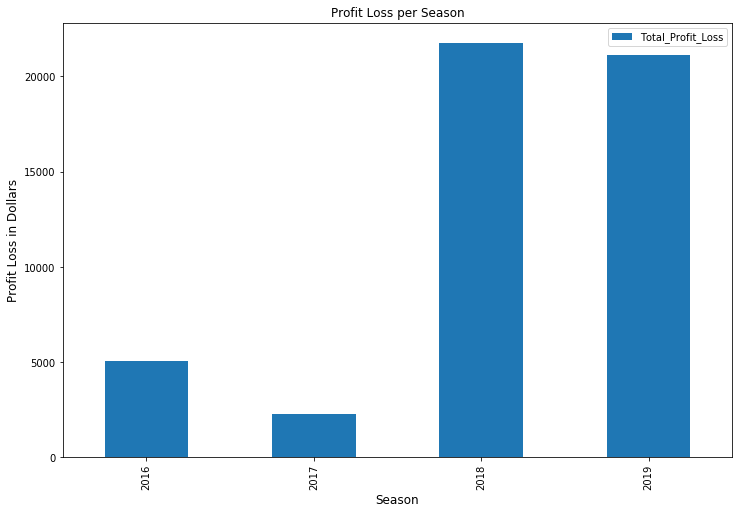

In [136]:
# Plot profits per season
ax = total_profit_loss_by_season.plot(kind = 'bar', figsize = (12,8), title = 'Profit Loss per Season')
ax.set_ylabel('Profit Loss in Dollars', fontsize = 12)
ax.set_xlabel('Season', fontsize = 12)
plt.show()